# Hackathon 16/10/2024 
## Group 1 
Bálint Rékasi

Kian Smit

Sophie Deahl

Maria Chatzigeorgiou

### Formulate a research question

After careful consideritation we decided to include the data from 3 datasets, Public spaces, Housing and Safety. 

Public spaces: Municipality involves the local residents in approach of safety and quality of life in the neighbourhood (% agrees)
Green spaces (1-10)
Neighbourhood clean (%)

Housing:
Property: % Housing corporation	
Property: % Private rent	
Property: % Owner-occupied

Safety:
Safety measures home (%)
Safety neighbourhood (1-10)

Our research question is:
How do housing tenure mix and public spaces influence their feelings of safety in their neighbourhoods?

Before starting our programming, we import all the Python extensions that Will be necessary for the Research:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

import seaborn as sns

%matplotlib inline

Now we have to read our dataframes

In [2]:
public_spaces = pd.read_excel('data/Public spaces.xlsx')
housing = pd.read_excel('data/Housing.xlsx')
safety = pd.read_excel('data/Safety.xlsx')

In [3]:
public_spaces.head()

,Geography,Area,Area code,Year,theme,Green spaces (1-10),Playing facilities (1-10),Clean-up state streets and pavements (1-10),Clean-up state green spaces (1-10),Clean-up state playing facilities (1-10),...,Area public green (ha),Area: % water,Area: % buildings,Nuisance: pollution (1-10),Neighbourhood clean (%),Neighbourhood dirty (%),Area: % green,Area water (ha),Area land (ha),% Area land (ha)
0,Wijken,Haarlemmerbuurt,AA,2021,Public space,6.5,6.9,6.7,6.7,7.1,...,1.33,34.57,32.75,6,38,19,1.63,28.16,53.29,65.43
1,Wijken,Jordaan,AB,2021,Public space,5.9,6.2,6.4,6.3,6.6,...,0.74,12.11,56.49,5.7,38,20,0.78,11.46,83.19,87.89
2,Wijken,Grachtengordel-West,AC,2021,Public space,5.8,6,6.8,6.4,6.4,...,-,20.71,58.06,5.9,39,20,-,11.78,45.12,79.29
3,Wijken,Burgwallen-Nieuwe Zijde,AD,2021,Public space,4.6,4.3,6,5.4,4.5,...,0.11,23.63,36.13,4.7,30,35,0.16,17.21,55.63,76.37
4,Wijken,Burgwallen-Oude Zijde,AE,2021,Public space,4.8,4.8,7,5.9,5.8,...,0.02,13.88,57.19,5.6,22,40,0.05,5.62,34.85,86.12


In [4]:
housing.head()

,Geography,Area,Area code,Year,theme,Housing stock,Housing density,Trailer space,Mooring place,Sheltered accommodations,...,Wish to move 65+ (%),Neighbourhood: Satisfaction with neighbourhood (1-10),Neighbourhood: pleasant to live (1-10),Neighbourhood: Expected development (1-10),Neighbourhood: % improved,Neighbourhood: % stayed the same,Neighbourhood: % deteriorated,Neighbourhood: feeling at home (1-10),Involvement neighbours (1-10),Rent: average in commercial sector
0,Wijken,Haarlemmerbuurt,AA,2021,Housing,5654,10558,4,135,38,...,16,8.2,8,7.2,14,65,16,8.3,6.7,-
1,Wijken,Jordaan,AB,2021,Housing,13217,15870,1,113,6,...,14,8.2,7.8,7,15,62,18,8.3,6.8,1414
2,Wijken,Grachtengordel-West,AC,2021,Housing,4316,9638,1,75,9,...,13,8.4,8,7,13,64,19,8.4,6.6,-
3,Wijken,Burgwallen-Nieuwe Zijde,AD,2021,Housing,2972,5302,1,13,5,...,-,7.2,7.5,6.6,26,47,18,7.7,5.7,1434
4,Wijken,Burgwallen-Oude Zijde,AE,2021,Housing,2974,8535,-,3,12,...,-,7.3,7.1,6.6,32,40,22,7.8,6.5,-


In [5]:
safety.head()

,Geography,Area,Area code,Year,theme,Safety index: registered crime index,Safety index: High Volume Crime,Safety index: High Impact Crime,Safety index: reported victimization index,Safety index: reported victimization of High Volume Crimes,...,Nuisance: subletting tourists (%),Nuisance: tourists,Nuisance: locals (%),Nuisance: bothered in the street (%),Nuisance: youths congegrating (%),Nuisance: noise (%),Nuisance: neighbours (1-10),Nuisance: other groups of people (1-10),Nuisance: catering (1-10),Victimization: sexual assault (%)
0,Wijken,Haarlemmerbuurt,AA,2021,Safety,81,77,85,75,92,...,11,19,8,3,9,17,7.5,7.2,7.6,-
1,Wijken,Jordaan,AB,2021,Safety,123,103,145,111,96,...,14,23,8,4,10,21,7.2,7,7.2,1
2,Wijken,Grachtengordel-West,AC,2021,Safety,89,109,64,164,223,...,18,36,8,5,6,18,7.4,7.1,7.2,4
3,Wijken,Burgwallen-Nieuwe Zijde,AD,2021,Safety,210,213,206,154,120,...,25,39,10,7,16,31,6.8,6.1,5.8,8
4,Wijken,Burgwallen-Oude Zijde,AE,2021,Safety,138,137,139,134,101,...,22,50,9,26,20,42,7.4,5.8,5.5,1


We identified that the first 4 rows are common across all three dataframes: housing, safety, and public spaces. To merge these datasets, we will use the "Area code" as the shared key. Additionally, we will exclude the columns "Geography", "Area", and "Year" from the housing and safety datasets, ensuring these columns remain only in the public spaces dataset.

In [6]:
housing_clean = housing.drop(['Area', 'Geography', 'Year'], axis='columns')
safety_clean = safety.drop(['Area', 'Geography', 'Year'], axis='columns')                       

In [7]:
#merge first the 2 dataframes
merged_df1 =  pd.merge(public_spaces, housing_clean, how = 'outer', on='Area code')
merged_final = pd.merge(merged_df1, safety_clean, how = 'outer', on = 'Area code')

#check if our merging proccess was successful 
merged_final.head()

,Geography,Area,Area code,Year,theme_x,Green spaces (1-10),Playing facilities (1-10),Clean-up state streets and pavements (1-10),Clean-up state green spaces (1-10),Clean-up state playing facilities (1-10),...,Nuisance: subletting tourists (%),Nuisance: tourists,Nuisance: locals (%),Nuisance: bothered in the street (%),Nuisance: youths congegrating (%),Nuisance: noise (%),Nuisance: neighbours (1-10),Nuisance: other groups of people (1-10),Nuisance: catering (1-10),Victimization: sexual assault (%)
0,Wijken,Haarlemmerbuurt,AA,2021,Public space,6.5,6.9,6.7,6.7,7.1,...,11,19,8,3,9,17,7.5,7.2,7.6,-
1,Wijken,Jordaan,AB,2021,Public space,5.9,6.2,6.4,6.3,6.6,...,14,23,8,4,10,21,7.2,7,7.2,1
2,Wijken,Grachtengordel-West,AC,2021,Public space,5.8,6,6.8,6.4,6.4,...,18,36,8,5,6,18,7.4,7.1,7.2,4
3,Wijken,Burgwallen-Nieuwe Zijde,AD,2021,Public space,4.6,4.3,6,5.4,4.5,...,25,39,10,7,16,31,6.8,6.1,5.8,8
4,Wijken,Burgwallen-Oude Zijde,AE,2021,Public space,4.8,4.8,7,5.9,5.8,...,22,50,9,26,20,42,7.4,5.8,5.5,1


We want to check how many rows and columns we have in general.

In [8]:
merged_final.shape

(106, 146)

Now we want to create a new dataframe where we only have the columns we will use in order to answer our Research question 

In [9]:
#we renamed 2 columns because we had some errors reagrding the names of them
merged_final.rename(columns={'Property: % Owner-occupied': 'OwnerOccupied','Municipality involves the local residents in approach of safety and quality of life in the neighbourhood (% agrees)': 'Municipality_residents'}, inplace=True)


In [10]:
rq_df = merged_final[['Area', 'Area code', 'Property: % Housing corporation', 'Property: % Private rent', 'OwnerOccupied', 'Municipality_residents', 'Safety index: registered crime index', 'Safety measures home (%)', 'Safety neighbourhood (1-10)', 'Neighbourhood clean (%)', 'Neighbourhood dirty (%)',
'Area: % green']] 

In [11]:
rq_df.shape #checking the shape of our new dataframe

(106, 12)

In [12]:
rq_df.dtypes #checking the type of our variables

Area                                     object
Area code                                object
Property: % Housing corporation          object
Property: % Private rent                 object
OwnerOccupied                           float64
Municipality_residents                   object
Safety index: registered crime index     object
Safety measures home (%)                 object
Safety neighbourhood (1-10)              object
Neighbourhood clean (%)                  object
Neighbourhood dirty (%)                  object
Area: % green                            object
dtype: object

We need to convert the relevant columns to numeric data types so that we can accurately identify any missing values

In [13]:
columns_to_convert = ['Property: % Housing corporation', 'Property: % Private rent', 'OwnerOccupied', 'Municipality_residents', 'Safety index: registered crime index', 'Safety measures home (%)', 'Safety neighbourhood (1-10)', 'Neighbourhood clean (%)', 'Neighbourhood dirty (%)', 'Area: % green']

for col in columns_to_convert:
    rq_df[col] = pd.to_numeric(rq_df[col], errors='coerce')

C:\Users\maria\AppData\Local\Temp\ipykernel_6020\2051958481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rq_df[col] = pd.to_numeric(rq_df[col], errors='coerce')


In [14]:
rq_df.dtypes

Area                                     object
Area code                                object
Property: % Housing corporation         float64
Property: % Private rent                float64
OwnerOccupied                           float64
Municipality_residents                  float64
Safety index: registered crime index    float64
Safety measures home (%)                float64
Safety neighbourhood (1-10)             float64
Neighbourhood clean (%)                 float64
Neighbourhood dirty (%)                 float64
Area: % green                           float64
dtype: object

In [15]:
print(rq_df.isnull().sum())

Area                                     0
Area code                                1
Property: % Housing corporation          7
Property: % Private rent                 1
OwnerOccupied                            0
Municipality_residents                  14
Safety index: registered crime index    12
Safety measures home (%)                13
Safety neighbourhood (1-10)             13
Neighbourhood clean (%)                 14
Neighbourhood dirty (%)                 14
Area: % green                           15
dtype: int64


We deleted 7 rows in the housing columns because these neighbourhoods didn't have any social housing (0%).
Then we looked at the indepent variable which is related to the percentage of people that agree to have been involved in this process.
Second step we have to delete another 8 rows because of missing data in most of the columns

In [16]:
cleaned_rq = rq_df.dropna(inplace=False)

In [17]:
print(cleaned_rq.isnull().sum())

Area                                    0
Area code                               0
Property: % Housing corporation         0
Property: % Private rent                0
OwnerOccupied                           0
Municipality_residents                  0
Safety index: registered crime index    0
Safety measures home (%)                0
Safety neighbourhood (1-10)             0
Neighbourhood clean (%)                 0
Neighbourhood dirty (%)                 0
Area: % green                           0
dtype: int64


In [18]:
cleaned_rq.shape #checking the final shape of our dataframe

(78, 12)

In [19]:
cleaned_rq.to_csv("data/cleaned_rq.csv", index=False,header=True)

Our selected dependent variable

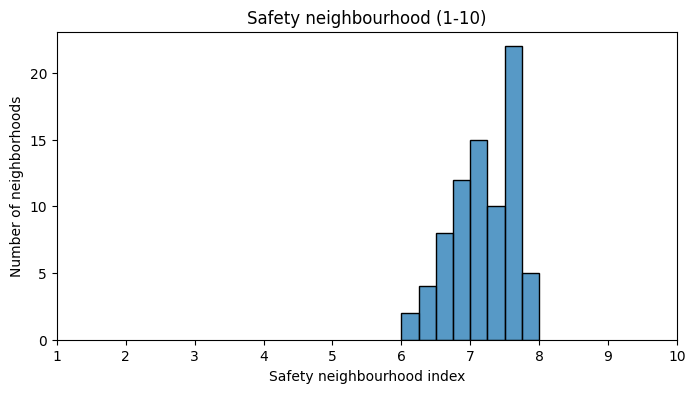

In [21]:
#Taking the data
safe_neigh = cleaned_rq['Safety neighbourhood (1-10)']

# Creating a histogram by setting the size of it and the with of the bins
plt.figure(figsize=(8, 4))  # the size of the figure
sns.histplot(safe_neigh, binwidth=0.25)  # width of the bins is low to see the small differences

plt.xlim(1, 10)  #the index goes from 1 to 10, so the x-axis is between this 2 numbers
plt.title('Safety neighbourhood (1-10)')
plt.xlabel('Safety neighbourhood index')
plt.ylabel('Number of neighborhoods')

#plotting the histogram
plt.show()

We observed that the ratings consistently fall between 6 and 8, indicating a narrow range. This suggests that no one feels extremely unsafe or completely safe.

In [22]:
X = cleaned_rq[['Property: % Private rent', 'OwnerOccupied', 'Safety index: registered crime index', 'Municipality_residents', 'Safety measures home (%)', 'Neighbourhood clean (%)', 'Area: % green']]
y = cleaned_rq[['Safety neighbourhood (1-10)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Add a constant to the model
X_train_with_const = sm.add_constant(X_train)
regression = sm.OLS(y_train, sm.add_constant(X_train))
results = regression.fit()
results.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Safety neighbourhood (1-10)   R-squared:                       0.656
Model:                                     OLS   Adj. R-squared:                  0.612
Method:                          Least Squares   F-statistic:                     14.73
Date:                         Wed, 16 Oct 2024   Prob (F-statistic):           1.46e-10
Time:                                 14:38:15   Log-Likelihood:                -5.4415
No. Observations:                           62   AIC:                             26.88
Df Residuals:                               54   BIC:                             43.90
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    6.8034      0.491     13.865      0.000       5.820       7.787
Property: % Private rent                 0.0042      0.003      1.599      0.116      -0.001       0.009
OwnerOccupied                            0.0069      0.004      1.590      0.118      -0.002       0.016
Safety index: registered crime index    -0.0007      0.001     -0.545      0.588      -0.003       0.002
Municipality_residents                   0.0037      0.005      0.678      0.501      -0.007       0.015
Safety measures home (%)                -0.0162      0.006     -2.670      0.010      -0.028      -0.004
Neighbourhood clean (%)                  0.0262      0.004      6.831      0.000       0.019       0.034
Area: % green                           -0.0028      0.003     -0.932      0.355      -0.009       0.003
==============================================================================
Omnibus:                        3.966   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.890
Skew:                          -0.589   Prob(JB):                        0.143
Kurtosis:                       2.658   Cond. No.                     2.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We recognize that our Condition Number is extremely high, indicating significant multicollinearity within our model. To address this, we will investigate the relationships between our variables by analyzing their correlations to confirm and quantify the extent of multicollinearity. This comparison will help us identify which variables are highly correlated and contributing to the issue. However, we will not explore this issue further at this time.

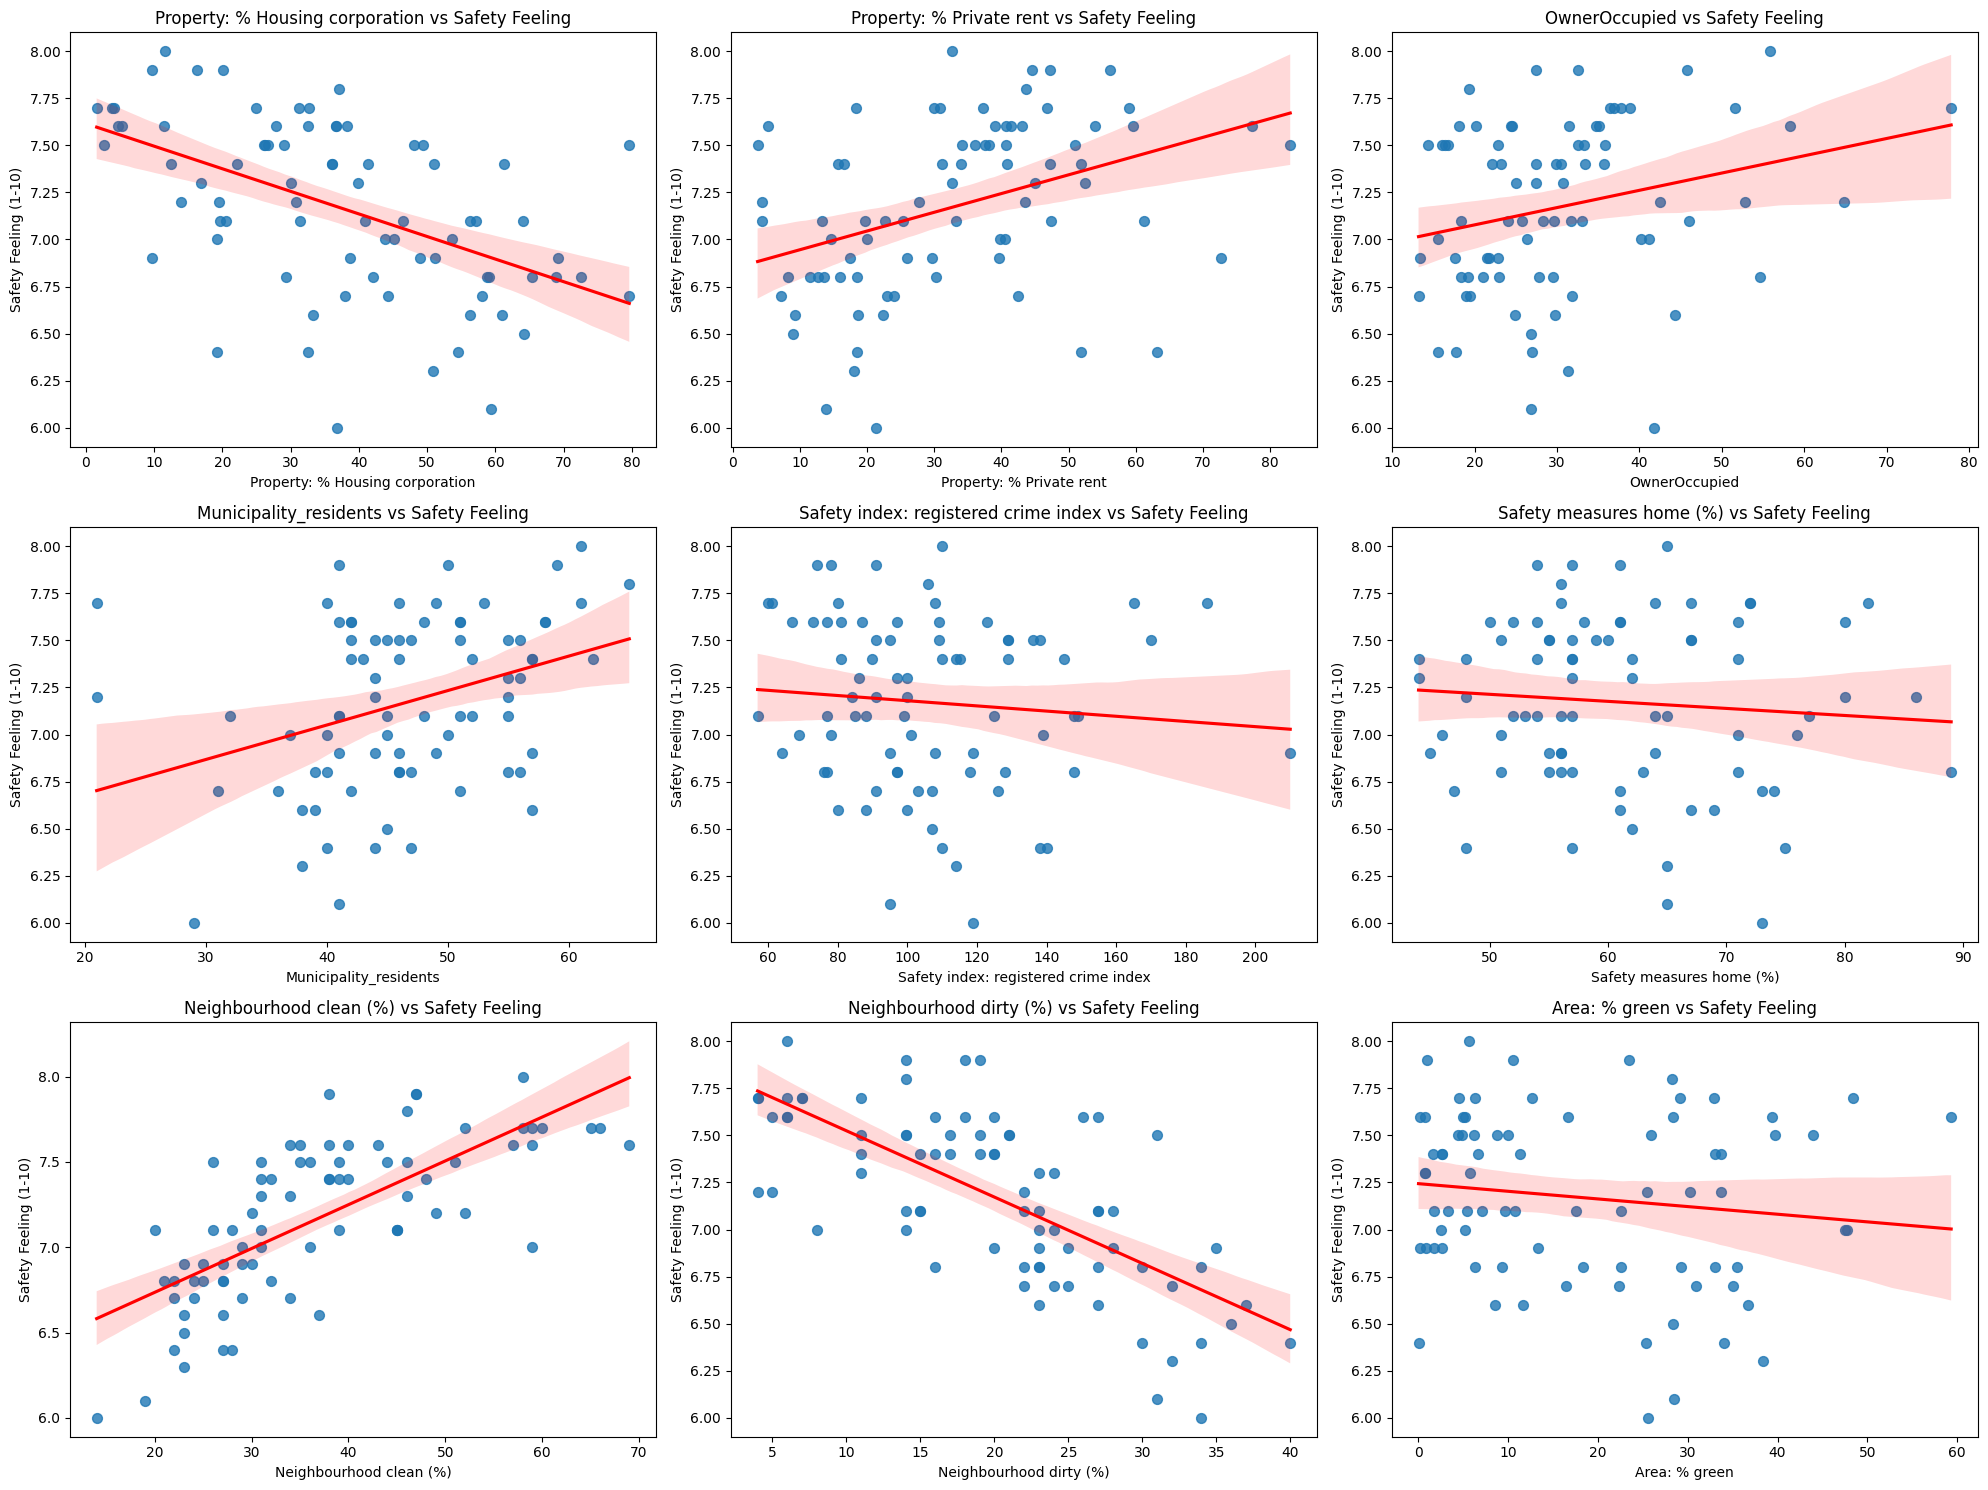

In [23]:
# List of independent variables you want to compare to safety feeling
columns = [
    'Property: % Housing corporation',
    'Property: % Private rent',
    'OwnerOccupied',
    'Municipality_residents',
    'Safety index: registered crime index',
    'Safety measures home (%)',
    'Neighbourhood clean (%)',
    'Neighbourhood dirty (%)',
    'Area: % green'
]

# Create a grid of scatter plots with regression lines (3 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(20, 15))  # Adjust the grid size

# Loop through each variable and plot a scatter plot with regression line
for ax, col in zip(axes.flat, columns):
    sns.regplot(x=col, y='Safety neighbourhood (1-10)', data=cleaned_rq, ax=ax, scatter_kws={'s':50}, line_kws={"color":"red"})
    ax.set_title(f'{col} vs Safety Feeling')
    ax.set_xlabel(col)
    ax.set_ylabel('Safety Feeling (1-10)')

plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()